In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193


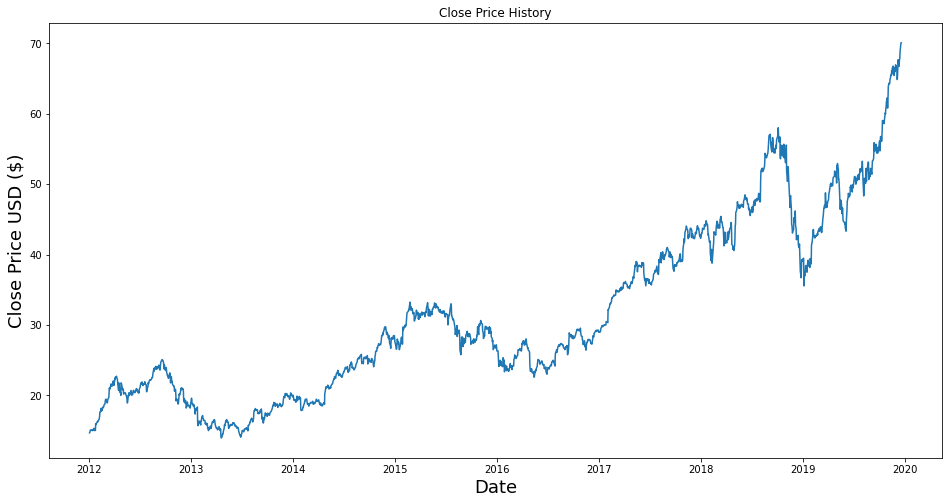

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
data=df.filter(['Close'])
print(type(data))
print(data.head(19))

<class 'pandas.core.frame.DataFrame'>
                Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765715
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786
2012-01-10  15.115714
2012-01-11  15.091071
2012-01-12  15.049643
2012-01-13  14.993215
2012-01-17  15.167857
2012-01-18  15.325357
2012-01-19  15.276786
2012-01-20  15.010715
2012-01-23  15.264643
2012-01-24  15.014643
2012-01-25  15.952143
2012-01-26  15.879642
2012-01-27  15.974286
2012-01-30  16.178928


In [6]:
dataset=data.values
print(type(dataset))
print(dataset)

<class 'numpy.ndarray'>
[[14.6867857 ]
 [14.76571465]
 [14.92964268]
 ...
 [68.78749847]
 [69.96499634]
 [70.10250092]]


In [7]:

training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1603

In [8]:
len(dataset)

2003

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [10]:
train_data = scaled_data[0:training_data_len,:]
print(train_data)

[[0.01316509]
 [0.01457064]
 [0.01748985]
 ...
 [0.58926183]
 [0.58164901]
 [0.58939538]]


In [11]:
X_train=[]
y_train=[]
for i in range(60,len(train_data)):
    # 0, 1, 2, ..., 1603-60
    # 60,61,62,...,1603
    
    X_train.append(train_data[i-60:i,0]) #0-59
    
    y_train.append(train_data[i,0])       #60th
    
    if i<=63:
        print(X_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [12]:
X_train,y_train=np.array(X_train),np.array(y_train)
print(X_train)
print(y_train)

[[0.01316509 0.01457064 0.01748985 ... 0.13766105 0.14243103 0.14442805]
 [0.01457064 0.01748985 0.02026915 ... 0.14243103 0.14442805 0.13949272]
 [0.01748985 0.02026915 0.01984303 ... 0.14442805 0.13949272 0.13293563]
 ...
 [0.52177011 0.51927696 0.51669488 ... 0.5857448  0.59767603 0.5912207 ]
 [0.51927696 0.51669488 0.51322235 ... 0.59767603 0.5912207  0.58926183]
 [0.51669488 0.51322235 0.51958863 ... 0.5912207  0.58926183 0.58164901]]
[0.13949272 0.13293563 0.14507041 ... 0.58926183 0.58164901 0.58939538]


In [13]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train)
X_train.shape

[[[0.01316509]
  [0.01457064]
  [0.01748985]
  ...
  [0.13766105]
  [0.14243103]
  [0.14442805]]

 [[0.01457064]
  [0.01748985]
  [0.02026915]
  ...
  [0.14243103]
  [0.14442805]
  [0.13949272]]

 [[0.01748985]
  [0.02026915]
  [0.01984303]
  ...
  [0.14442805]
  [0.13949272]
  [0.13293563]]

 ...

 [[0.52177011]
  [0.51927696]
  [0.51669488]
  ...
  [0.5857448 ]
  [0.59767603]
  [0.5912207 ]]

 [[0.51927696]
  [0.51669488]
  [0.51322235]
  ...
  [0.59767603]
  [0.5912207 ]
  [0.58926183]]

 [[0.51669488]
  [0.51322235]
  [0.51958863]
  ...
  [0.5912207 ]
  [0.58926183]
  [0.58164901]]]


(1543, 60, 1)

In [14]:
X_train

array([[[0.01316509],
        [0.01457064],
        [0.01748985],
        ...,
        [0.13766105],
        [0.14243103],
        [0.14442805]],

       [[0.01457064],
        [0.01748985],
        [0.02026915],
        ...,
        [0.14243103],
        [0.14442805],
        [0.13949272]],

       [[0.01748985],
        [0.02026915],
        [0.01984303],
        ...,
        [0.14442805],
        [0.13949272],
        [0.13293563]],

       ...,

       [[0.52177011],
        [0.51927696],
        [0.51669488],
        ...,
        [0.5857448 ],
        [0.59767603],
        [0.5912207 ]],

       [[0.51927696],
        [0.51669488],
        [0.51322235],
        ...,
        [0.59767603],
        [0.5912207 ],
        [0.58926183]],

       [[0.51669488],
        [0.51322235],
        [0.51958863],
        ...,
        [0.5912207 ],
        [0.58926183],
        [0.58164901]]])

In [15]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [19]:
import pydot
from keras import utils
utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [20]:
model.fit(X_train,y_train,batch_size=100,epochs=20)

Epoch 1/10
16/16 [==============================] - 1s 65ms/step - loss: 0.0127
Epoch 2/10
16/16 [==============================] - 1s 68ms/step - loss: 0.0021
Epoch 3/10
16/16 [==============================] - 1s 71ms/step - loss: 5.4554e-04
Epoch 4/10
16/16 [==============================] - 1s 66ms/step - loss: 3.4547e-04
Epoch 5/10
16/16 [==============================] - 2s 148ms/step - loss: 3.1640e-04
Epoch 6/10
16/16 [==============================] - 1s 65ms/step - loss: 3.0832e-04
Epoch 7/10
16/16 [==============================] - 1s 65ms/step - loss: 3.0332e-04
Epoch 8/10
16/16 [==============================] - 2s 146ms/step - loss: 2.9720e-04
Epoch 9/10
16/16 [==============================] - 1s 77ms/step - loss: 2.9639e-04
Epoch 10/10
16/16 [==============================] - 1s 85ms/step - loss: 3.0380e-04


In [21]:
test_data=scaled_data[training_data_len-60:,:]
X_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [22]:
X_test=np.array(X_test)

In [23]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(400, 60, 1)

In [24]:
predict=model.predict(X_test)
predict=scaler.inverse_transform(predict)

In [25]:
rmse=np.sqrt(np.mean(predict-y_test)**2)
rmse

0.5370376491546631

In [26]:
predict = predict.reshape(-1)

In [27]:
predict

array([45.446888, 45.709103, 45.91921 , 46.09912 , 46.24661 , 46.378902,
       46.493683, 46.59667 , 46.68059 , 46.744102, 46.784687, 46.843307,
       46.92876 , 47.04461 , 47.183365, 47.32634 , 47.447525, 47.543488,
       47.628944, 47.687263, 47.725708, 47.728745, 47.706623, 47.63677 ,
       47.546024, 47.43443 , 47.3081  , 47.148705, 46.997356, 46.855415,
       46.740147, 46.644028, 46.586597, 46.52386 , 46.475235, 46.46485 ,
       46.508118, 46.583622, 46.651802, 46.744328, 46.852398, 46.96186 ,
       47.072983, 47.16939 , 47.26694 , 47.356567, 47.438778, 47.526993,
       47.634644, 47.74482 , 47.81839 , 47.852505, 47.862217, 47.971752,
       48.206593, 48.52357 , 48.893852, 49.263554, 49.61745 , 49.961544,
       50.269978, 50.55457 , 50.819984, 51.066353, 51.321377, 51.615807,
       51.90309 , 52.16892 , 52.408783, 52.625294, 52.82374 , 53.02    ,
       53.22486 , 53.460842, 53.72922 , 54.034893, 54.360256, 54.669544,
       54.91561 , 55.0893  , 55.17582 , 55.256348, 

In [28]:
train = data[: training_data_len]
valid = data[training_data_len:] 
valid['Predictions'] = predict
#valid = predict

<ipython-input-28-05d1c9c5167c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predict


In [29]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,45.446888
2018-05-18,46.577499,45.709103
2018-05-21,46.907501,45.919209
2018-05-22,46.790001,46.099121
2018-05-23,47.090000,46.246609
...,...,...
2019-12-11,67.692497,65.425858
2019-12-12,67.864998,65.541451
2019-12-13,68.787498,65.678154


In [30]:
#train['Close'][training_data_len:] = predict

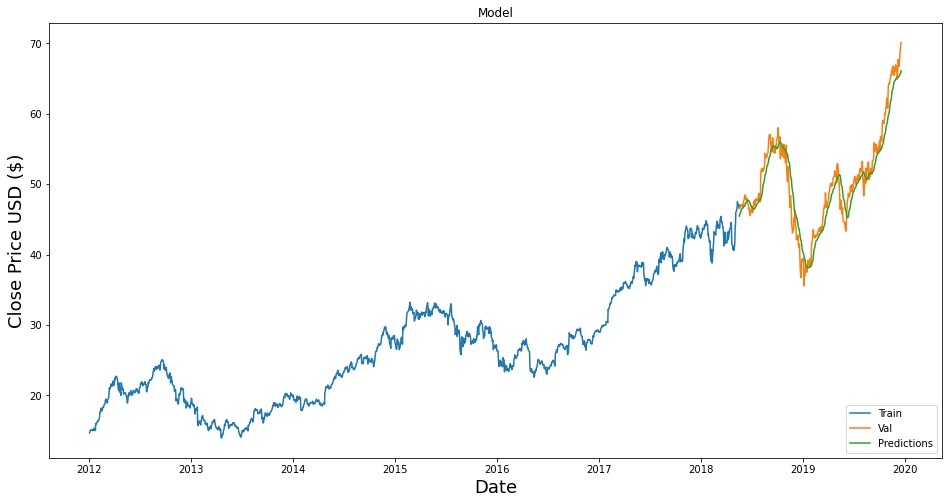

In [31]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [32]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,45.446888
2018-05-18,46.577499,45.709103
2018-05-21,46.907501,45.919209
2018-05-22,46.790001,46.099121
2018-05-23,47.090000,46.246609
...,...,...
2019-12-11,67.692497,65.425858
2019-12-12,67.864998,65.541451
2019-12-13,68.787498,65.678154


In [33]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')


new_df = apple_quote.filter(['Close'])


last_60_days = new_df[-60:].values


last_60_days_scaled = scaler.transform(last_60_days)


X_test = []


X_test.append(last_60_days_scaled)


X_test = np.array(X_test)


X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[66.39794]]


In [34]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
